In [1]:
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import folium

# Data Preparation

## Import Data

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# Data Understanding

## Jumlah Data

In [3]:
df.shape

(13490604, 7)

Dapat diketahui bahwa jumlah data pada London Crime berjumlah 13,490,604

## Menampilkan 10 Data Teratas

In [4]:
df.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


## Menampilkan 10 Data Terbawah

In [5]:
df.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Dataset ini berisi mengenai :
* lsoa_code : merepresentasikan area kepolisian
* borough : wilayah london yang terkait dengan statistik
* major_category : kategori kejahatan
* minor_category : spesifikasi kejahatan dari kategori kejahatan
* value : jumlah kejahatan untuk wilayah tertentu per bulan
* year : tahun ringkasan statistik
* month : bulan ringkasan statistik

## Area Kepolisian

In [6]:
area_polisi = pd.DataFrame(df['lsoa_code'].unique())
area_polisi

,0
0,E01001116
1,E01001646
2,E01000677
3,E01003774
4,E01004563
...,...
4830,E01002996
4831,E01002108
4832,E01001562
4833,E01002598


Diketahui terdapat 4835 area kepolisian yang ada di London

## Rentang Tahun

In [7]:
data_tahun = pd.DataFrame(df['year'].unique())
data_tahun

,0
0,2016
1,2015
2,2008
3,2012
4,2010
5,2013
6,2014
7,2011
8,2009


Dapat dilihat bahwa rentang waktu pada data London Crime berkisar pada tahun 2008-2016

## Wilayah Administratif London

In [8]:
data_wilayah = pd.DataFrame(df['borough'].unique())
data_wilayah

,0
0,Croydon
1,Greenwich
2,Bromley
3,Redbridge
4,Wandsworth
5,Ealing
6,Hounslow
7,Newham
8,Sutton
9,Haringey


Dapat diketahui terdapat 33 wilayah administratif dari kota London

## Kategori Kejahatan

In [9]:
data_maj_cat = pd.DataFrame(df['major_category'].unique())
data_maj_cat

,0
0,Burglary
1,Violence Against the Person
2,Robbery
3,Theft and Handling
4,Criminal Damage
5,Drugs
6,Fraud or Forgery
7,Other Notifiable Offences
8,Sexual Offences


Terdapat sekitar 9 kategori kejahatan yang tercatat pada dataset London Crime

## Spesifikasi Kejahatan

In [10]:
data_min_cat = pd.DataFrame(df['minor_category'].unique())
data_min_cat

,0
0,Burglary in Other Buildings
1,Other violence
2,Personal Property
3,Other Theft
4,Offensive Weapon
5,Criminal Damage To Other Building
6,Theft/Taking of Pedal Cycle
7,Motor Vehicle Interference & Tampering
8,Theft/Taking Of Motor Vehicle
9,Wounding/GBH


Terdapat 32 spesifikasi kejahatan dari kategori kejahatan yang tercatat pada dataset London Crime

# Data Cleansing

## Cek Missing Value

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   lsoa_code       13490604 non-null  object
 1   borough         13490604 non-null  object
 2   major_category  13490604 non-null  object
 3   minor_category  13490604 non-null  object
 4   value           13490604 non-null  int64 
 5   year            13490604 non-null  int64 
 6   month           13490604 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Tidak ada data yang hilang dan tipe data yang ada sudah sesuai

## Cek Data Duplikat

In [12]:
df.duplicated().sum()

0

Data London Crime tidak ada yang duplikat

# Hipotesis

1. Top 5 wilayah administratif London yang paling banyak terjadi kejahatan dari tahun 2008-2016?
2. Bagaimana statistik wilayah Westminster, Lambeth, Southwark, Camden, dan Newhamdari dari tahun ke tahun?
3. Bagaimana distribusi jumlah kejahatan untuk wilayah Westminster, Lambeth, Southwark, Camden, dan Newhamdari tahun 2008-2016?
4. Bandingkan distribusi jumlah kejahatan untuk wilayah Lambeth, Southwark, Camden, dan Newhamdari dari tahun 2008-2016?
5. Apa saja 5 jenis kejahatan yang paling sering terjadi di London dari tahun 2008-2016?
6. Bagaimana statistik jumlah kejahatan mengenai Theft and Handling dari tahun 2008-2016?
7. Apa saja jenis-jenis kejahatan yang sering terjadi di London dari tahun 2008-2016 yang termasuk kategori Theft and Handling?
8. Wilayah mana yang paling sering terjadi kejahatan Theft and Handling di London?

# Data Visualization

## Top 5 Wilayah berdasarkan Banyaknya Terjadi Kejahatan

In [13]:
df_a = df.loc[:, ['year', 'borough', 'value']]
df_a = df_a.sort_values('year')
df_a

,year,borough,value
12504370,2008,Ealing,0
5807276,2008,Islington,0
5807272,2008,Newham,0
8512153,2008,Hackney,0
5807264,2008,Wandsworth,0
...,...,...,...
6171475,2016,Ealing,1
6171480,2016,Enfield,0
11948556,2016,Waltham Forest,0
6171412,2016,Hammersmith and Fulham,0


In [14]:
top5_borough_crime = df_a.groupby('borough')[['value']].sum().sort_values(by='value', ascending=False)
top5_borough_crime = top5_borough_crime.head(5).sort_values(by='value', ascending=True)
top5_borough_crime

,value
borough,
Newham,262024
Camden,275147
Southwark,278809
Lambeth,292178
Westminster,455028


Text(0.5, 1.0, 'Top 5 Borough that Committed Crimes from 2008 to 2016')

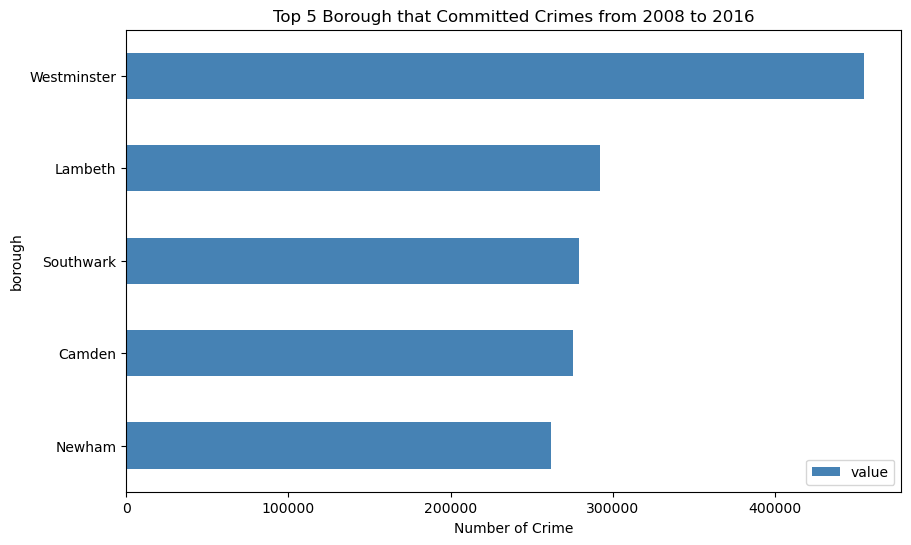

In [15]:
top5_borough_crime.plot(kind='barh', figsize=(10, 6), color='steelblue')

plt.xlabel('Number of Crime')
plt.title('Top 5 Borough that Committed Crimes from 2008 to 2016')

Dari bagan diatas dapat diketahui wilayah administratif London yang paling banyak terjadi kejahatan adalah Westminster, Lambeth, Southwark, Camden, dan Newham

## Statistik Kejahatan Wilayah Westminster, Lambeth, Southwark, Camden, dan Newhamdari dari 2008-2016?

In [16]:
df_b = df.loc[:, ['year', 'borough', 'value']]
df_b = df_b[(df_b['borough'] == 'Westminster') | (df_b['borough'] == 'Lambeth') | (df_b['borough'] == 'Southwark') | (df_b['borough'] == 'Camden') | (df_b['borough'] == 'Newham')]
df_b = df_b.sort_values(by='year')
df_b

,year,borough,value
9434206,2008,Southwark,1
7371398,2008,Westminster,0
2499487,2008,Newham,0
10325247,2008,Lambeth,1
7371459,2008,Southwark,0
...,...,...,...
5772084,2016,Southwark,0
12411025,2016,Lambeth,0
7297727,2016,Southwark,0
11638658,2016,Lambeth,0


In [17]:
stat_top5 = pd.DataFrame(df_b.groupby(['year', 'borough'])['value'].sum())
stat_top5 = stat_top5.pivot_table(index='year', columns='borough', values='value')
stat_top5

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


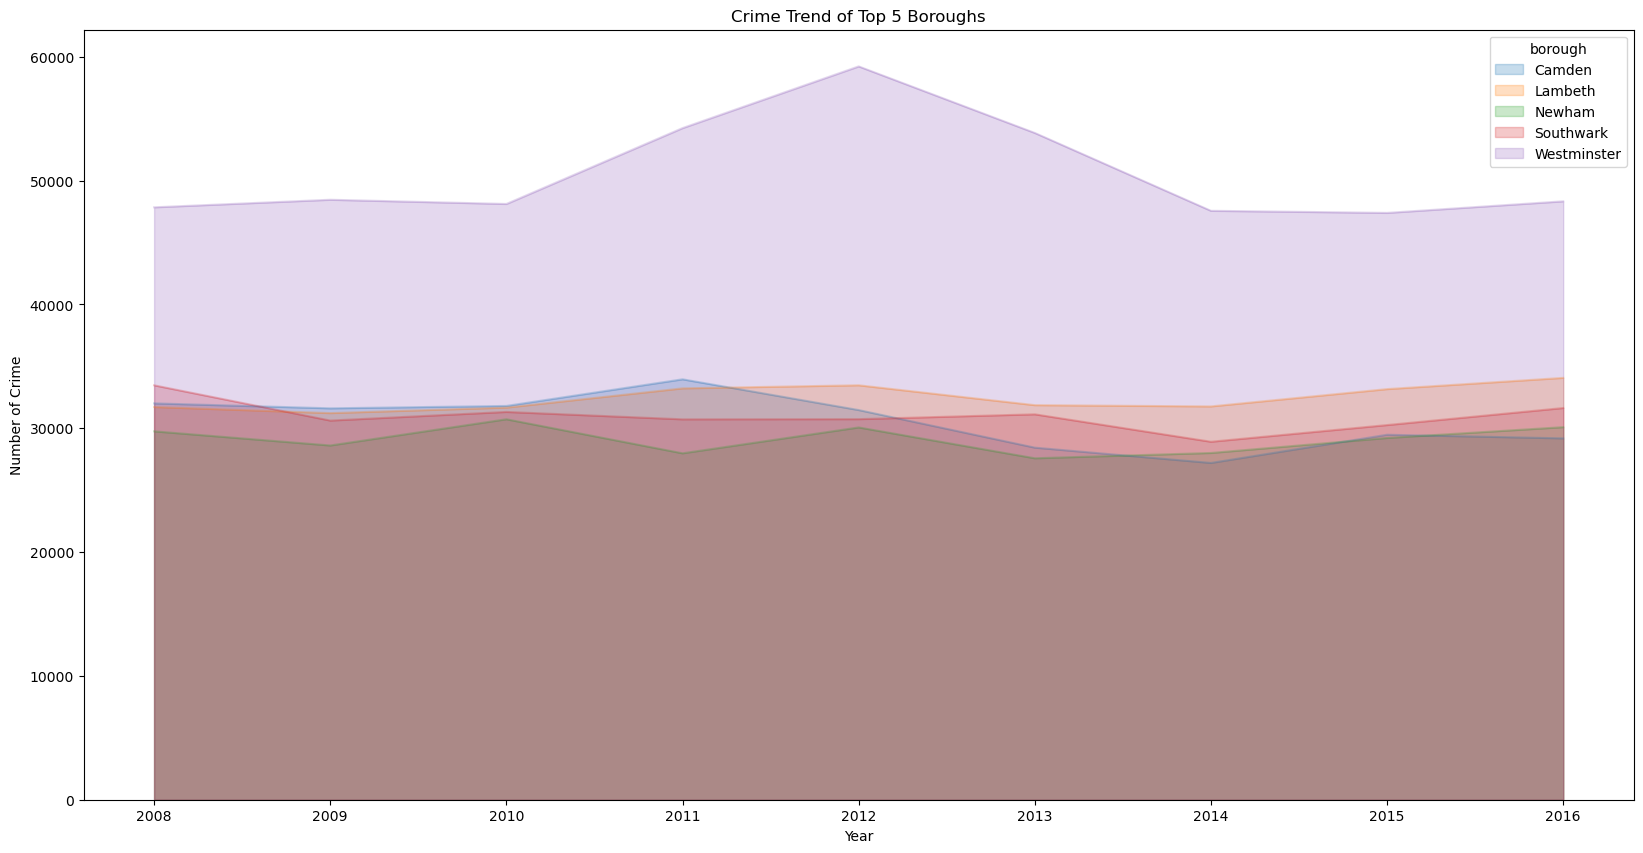

In [18]:
stat_top5.plot(kind='area',
               alpha=0.25,
               stacked=False,
               figsize=(20, 10),
              )

plt.title('Crime Trend of Top 5 Boroughs')
plt.ylabel('Number of Crime')
plt.xlabel('Year')

plt.show()

Dari bagan diatas dapat diketahui bahwa sejak tahun 2014 tidak terjadi peningkatan yang signifikan pada jumlah kejahatan di 5 wilayah yang tingkat kejahatannya tinggi. Selain itu peningkatan kejahatan terjadi diantara tahun 2010-2014 dikarenakan pada saat itu di London terjadi resesi ekonomi.

## Distribusi Kejahatan untuk Wilayah Westminster, Lambeth, Southwark, Camden, dan Newham dari tahun 2008-2016

In [19]:
df_c = df.loc[:, ['year', 'borough', 'value']]
df_c = df_c[(df_b['borough'] == 'Westminster') | (df_c['borough'] == 'Lambeth') | (df_c['borough'] == 'Southwark') | (df_c['borough'] == 'Camden') | (df_c['borough'] == 'Newham')]
df_c

,year,borough,value
8,2013,Newham,0
11,2015,Lambeth,0
21,2012,Westminster,0
38,2010,Lambeth,0
39,2015,Southwark,0
...,...,...,...
13490561,2015,Newham,0
13490565,2016,Westminster,0
13490567,2008,Southwark,0
13490575,2014,Southwark,0


In [20]:
dist_frek = pd.DataFrame(df_c.groupby(['year', 'borough'])['value'].sum())
dist_frek = dist_frek.pivot_table(index='year', columns='borough', values='value')
dist_frek

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


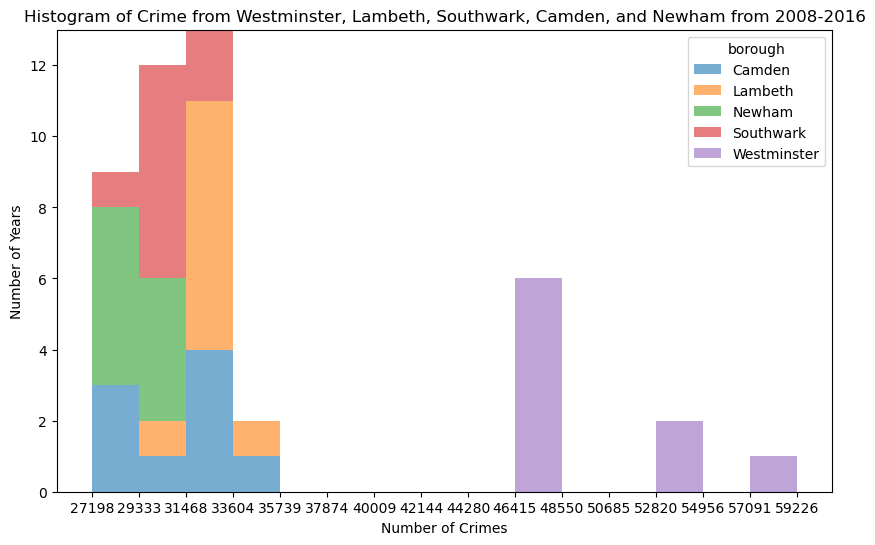

In [21]:
count, bin_edges = np.histogram(dist_frek, 15)
dist_frek.plot(kind='hist', 
               figsize=(10, 6),
               bins=15, 
               alpha=0.6, 
               stacked=True,
               xticks=bin_edges )

plt.title('Histogram of Crime from Westminster, Lambeth, Southwark, Camden, and Newham from 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crimes')

plt.show()

Dari bagan diatas dapat kita lihat bahwa Westminster berkontribusi paling banyak kejahatan di London sebesar 59,226

## Perbandingan Distribusi untuk Wilayah Lambeth, Southwark, Camden, dan Newham dari 2010-2016

In [22]:
df_e = df.loc[:, ['year', 'borough', 'value']]
df_e = df_e[(df_e['borough'] == 'Lambeth') | (df_e['borough'] == 'Southwark') | 
            (df_e['borough'] == 'Camden') | (df_e['borough'] == 'Newham')]
df_e

,year,borough,value
8,2013,Newham,0
11,2015,Lambeth,0
38,2010,Lambeth,0
39,2015,Southwark,0
41,2009,Newham,3
...,...,...,...
13490554,2009,Newham,0
13490561,2015,Newham,0
13490567,2008,Southwark,0
13490575,2014,Southwark,0


In [23]:
df_e.describe()

,year,value
count,1.852200e+06,1.852200e+06
mean,2.012000e+03,5.982928e-01
std,2.581990e+00,1.803466e+00
min,2.008000e+03,0.000000e+00
25%,2.010000e+03,0.000000e+00
50%,2.012000e+03,0.000000e+00
75%,2.014000e+03,1.000000e+00
max,2.016000e+03,1.560000e+02


In [24]:
comp_dist = pd.DataFrame(df_e.groupby(['year', 'borough'])['value'].sum())
comp_dist = comp_dist.pivot_table(index='year', columns='borough', values='value')
comp_dist

borough,Camden,Lambeth,Newham,Southwark
year,,,,
2008,32010,31717,29752,33470
2009,31612,31225,28610,30623
2010,31804,31671,30728,31320
2011,33956,33224,27978,30723
2012,31472,33473,30067,30737
2013,28435,31868,27577,31128
2014,27198,31765,28005,28912
2015,29477,33164,29217,30260
2016,29183,34071,30090,31636


Di salah satu plot sebelumnya, kita mengamati bahwa Lambeth, Southwark, Camden, dan Newham memiliki tren jumlah kejahatan yang mirip. Maka kita dapat melakukan analisis lebih jauh dengan menggunakan box plot.

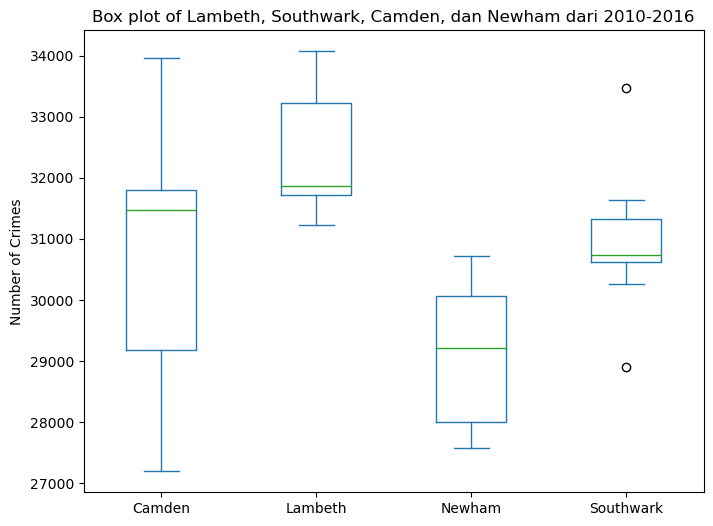

In [25]:
comp_dist.plot(kind='box', 
               figsize=(8, 6))

plt.title('Box plot of Lambeth, Southwark, Camden, dan Newham dari 2010-2016')
plt.ylabel('Number of Crimes')

plt.show()

Dapat diketahui dari bagan diatas meskipun keempat negara memiliki jumlah rata-rata kejahatan yang sama, namun range kejahatan Camden lebih tersebar daripada Lambeth, Newham, dan Southwark.

## Kejahatan yang Paling Sering Dilakukan

In [26]:
df_d = df.loc[:, ['major_category', 'value']]
df_d

,major_category,value
0,Burglary,0
1,Violence Against the Person,0
2,Violence Against the Person,0
3,Burglary,0
4,Robbery,0
...,...,...
13490599,Criminal Damage,0
13490600,Robbery,1
13490601,Burglary,0
13490602,Robbery,0


In [27]:
ttl_crime_5 = df_d.groupby('major_category')[['value']].sum().sort_values(by='value', ascending=False)
ttl_crime_5 = ttl_crime_5.head(5)
ttl_crime_5

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


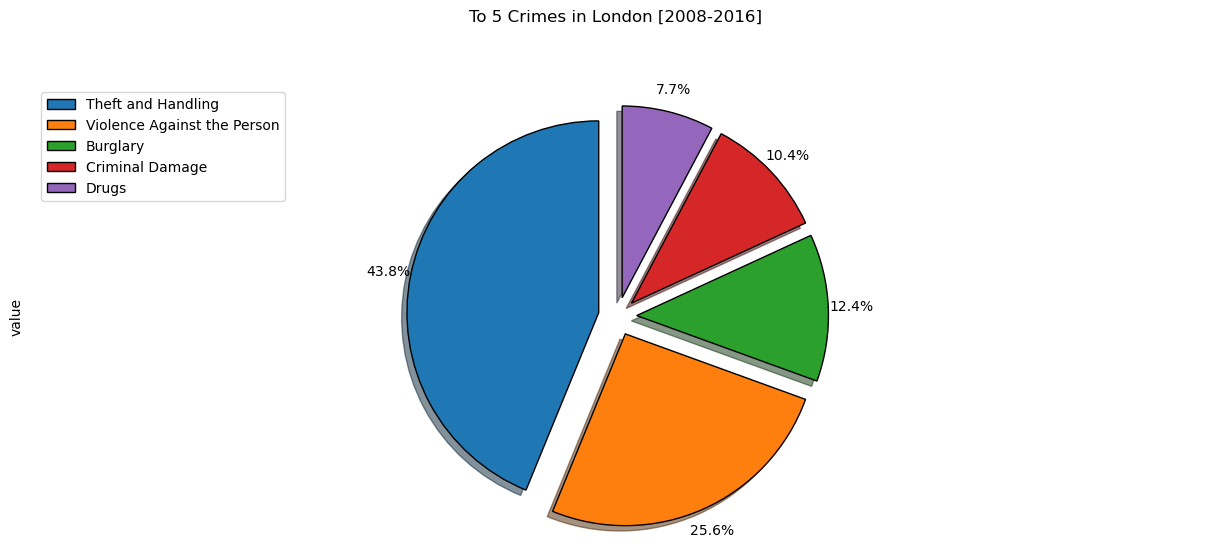

In [28]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

ttl_crime_5.plot(kind='pie',
               explode=explode,
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               subplots=True,
               labels=None,
               pctdistance=1.12,
               wedgeprops={'edgecolor' : 'black',
                           'linewidth' : 1,
                           'antialiased' : True
                          }
              )

plt.title('To 5 Crimes in London [2008-2016]', y=1.12)
plt.axis('equal')
plt.legend(labels=ttl_crime_5.index, loc='upper left')

plt.show()

Dari bagan diatas dapat diketahui jenis kejahatan yang paling sering terjadi pada tahun 2011-2016 di London adalah Theft and Handling dengan presentase sebesar 43.8%

## Statistik Kejahatan Mengenai Theft and Handling dari 2008-2016

In [29]:
df_f = df.loc[:, ['year', 'major_category', 'minor_category', 'value']]
df_f = df_f[(df_f['major_category'] == "Theft and Handling")]
df_f

,year,major_category,minor_category,value
5,2012,Theft and Handling,Other Theft,0
9,2016,Theft and Handling,Theft/Taking of Pedal Cycle,1
10,2013,Theft and Handling,Motor Vehicle Interference & Tampering,0
14,2016,Theft and Handling,Theft/Taking Of Motor Vehicle,0
16,2009,Theft and Handling,Other Theft Person,1
...,...,...,...,...
13490590,2012,Theft and Handling,Theft/Taking Of Motor Vehicle,1
13490593,2014,Theft and Handling,Handling Stolen Goods,0
13490596,2010,Theft and Handling,Theft From Shops,0
13490597,2014,Theft and Handling,Theft/Taking of Pedal Cycle,0


In [30]:
stat_crime_tah = pd.DataFrame(df_f.groupby(['year', 'major_category'])['value'].sum())
stat_crime_tah = stat_crime_tah.pivot_table(index='year', columns='major_category', values='value')
stat_crime_tah = stat_crime_tah.rename(columns={'Theft and Handling':'total'})
stat_crime_tah = stat_crime_tah.reset_index()
stat_crime_tah

major_category,year,total
0,2008,283692
1,2009,279492
2,2010,290924
3,2011,309292
4,2012,334054
5,2013,306372
6,2014,279880
7,2015,284022
8,2016,294133


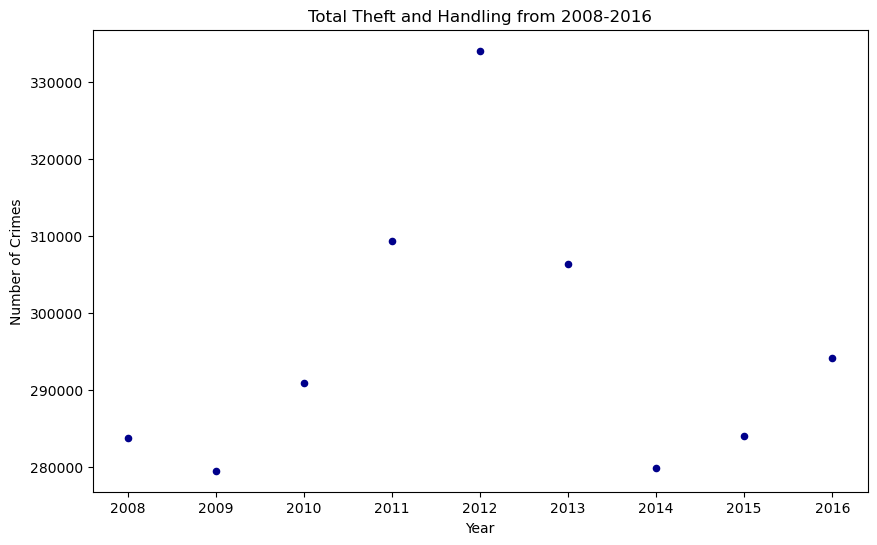

In [31]:
stat_crime_tah.plot(kind='scatter', 
                    x='year', 
                    y='total', 
                    figsize=(10, 6), 
                    color='darkblue')

plt.title('Total Theft and Handling from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

Dapat dilihat dari bagan diatas bahwa kejahatan Theft and Handling paling banyak terjadi pada tahun 2012 yaitu sekitar 330,000

## Jenis Kejahatan yang Termasuk Kategori Theft and Handling di London Tahun 2008-2016

In [32]:
df_f = df.loc[:, ['year', 'major_category', 'minor_category', 'value']]
df_f = df_f[(df_f['major_category'] == "Theft and Handling")]
df_f

,year,major_category,minor_category,value
5,2012,Theft and Handling,Other Theft,0
9,2016,Theft and Handling,Theft/Taking of Pedal Cycle,1
10,2013,Theft and Handling,Motor Vehicle Interference & Tampering,0
14,2016,Theft and Handling,Theft/Taking Of Motor Vehicle,0
16,2009,Theft and Handling,Other Theft Person,1
...,...,...,...,...
13490590,2012,Theft and Handling,Theft/Taking Of Motor Vehicle,1
13490593,2014,Theft and Handling,Handling Stolen Goods,0
13490596,2010,Theft and Handling,Theft From Shops,0
13490597,2014,Theft and Handling,Theft/Taking of Pedal Cycle,0


In [33]:
recent_tah = list(df_f['minor_category'])
recent_tah

['Other Theft',
 'Theft/Taking of Pedal Cycle',
 'Motor Vehicle Interference & Tampering',
 'Theft/Taking Of Motor Vehicle',
 'Other Theft Person',
 'Theft From Shops',
 'Handling Stolen Goods',
 'Other Theft Person',
 'Theft/Taking Of Motor Vehicle',
 'Theft From Shops',
 'Handling Stolen Goods',
 'Other Theft',
 'Theft/Taking Of Motor Vehicle',
 'Theft From Shops',
 'Motor Vehicle Interference & Tampering',
 'Theft/Taking Of Motor Vehicle',
 'Theft/Taking Of Motor Vehicle',
 'Other Theft Person',
 'Theft/Taking Of Motor Vehicle',
 'Theft/Taking Of Motor Vehicle',
 'Theft/Taking Of Motor Vehicle',
 'Theft/Taking of Pedal Cycle',
 'Theft From Shops',
 'Motor Vehicle Interference & Tampering',
 'Other Theft Person',
 'Theft/Taking Of Motor Vehicle',
 'Motor Vehicle Interference & Tampering',
 'Other Theft Person',
 'Theft/Taking of Pedal Cycle',
 'Handling Stolen Goods',
 'Theft/Taking of Pedal Cycle',
 'Motor Vehicle Interference & Tampering',
 'Handling Stolen Goods',
 'Other Theft',


In [34]:
stopwords = set(STOPWORDS)

In [35]:
recent_tah = ' '.join(df_f['minor_category'].astype(str).tolist())
recent_tah_wc = WordCloud(background_color='white',
                          stopwords=stopwords)

recent_tah_wc.generate(recent_tah)

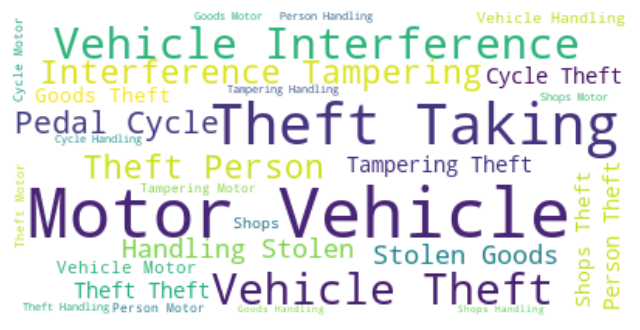

In [36]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

plt.imshow(recent_tah_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari bagan diatas dapat diketahui bahwa jenis Theft and Handling yang sering terjadi di London tahun 2008-2016 adalah pencurian Motor Vehicle

## Wilayah yang Sering Terjadi Kejahatan Theft and Handling

In [37]:
df_f = df.loc[:, ['major_category', 'borough', 'value']]
df_f = df_f[(df_f['major_category'] == "Theft and Handling")]
df_f

,major_category,borough,value
5,Theft and Handling,Ealing,0
9,Theft and Handling,Sutton,1
10,Theft and Handling,Haringey,0
14,Theft and Handling,Hillingdon,0
16,Theft and Handling,Barking and Dagenham,1
...,...,...,...
13490590,Theft and Handling,Greenwich,1
13490593,Theft and Handling,Wandsworth,0
13490596,Theft and Handling,Bromley,0
13490597,Theft and Handling,Brent,0


In [38]:
borough_tah = pd.DataFrame(df_f.groupby(['borough', 'major_category'])[['value']].sum().sort_values(by='value', ascending=False))
borough_tah = borough_tah.sort_values(by='value', ascending=False)
borough_tah

,,value
borough,major_category,
Westminster,Theft and Handling,277617
Camden,Theft and Handling,140596
Lambeth,Theft and Handling,114899
Southwark,Theft and Handling,109432
Islington,Theft and Handling,107661
Newham,Theft and Handling,106146
Kensington and Chelsea,Theft and Handling,95963
Ealing,Theft and Handling,93834
Wandsworth,Theft and Handling,92523


Diketahui bahwa wilayah kejahatan Theft and Handling paling banyak dilakukan di wilayah Westminster

In [39]:
# Garis Lintang dan Garis Bujur Wilayah Westminster
latitude = 51.494720
longitude = -0.135278

In [40]:
# Menampilkan Area Westminster
westminster_map = folium.Map(location=[latitude, longitude], 
                        zoom_start=12)

westminster_map

# Kesimpulan

Dari hasil analisa yang telah dilakukan dapat diketahui bahwa wilayah yang paling banyak terjadi kejahatan di London pada tahun 2008-2016 adalah Westminster, Lambeth, Southwark, Camden, dan Newham. Serta kategori kejahatan yang paling banyak terjadi yaitu Theft and Handling sebesar 43.8%, Violence Against the Person sebesar 26.6%, Burglary sebesar 12.4%, Criminal Damage sebesar 10.4%, dan Drugs sebesar 7.7%. Wilayah Westminster menyumbang paling banyak kejahatan sebesar 455,028 dengan 277,617 berasal dari Theft and Handling.